#### Task (mandatory):

    Estimate functional brain connectivity among 64 channels using one of the
    MVAR estimators: Partial Directed Coherence (PDC), Direct Transfer Function (DTF).
    Select one relevant frequency value. Apply a threshold so that the resulting binary
    connectivity matrices have network density equal to 20%. Create a graphical representation
    of the binary adjacency matrix.

#### Importing the routine libraries

In [1]:
import sys
sys.path.insert(0, '../Lib')
from homeworkLib import EEGGraph
import connectivipy as cp
import networkx as nx
import pandas as pd
import numpy as np
import pickle
import re
import scipy.signal as sig
import matplotlib.pyplot as plt

In [2]:
# creating two objects for our analysis
#   EO -> object representing the data recorded during eyes-opened resting state.
#   EC -> object representing the data recorded during eyes-closed resting state.
EO = EEGGraph("../../Data/S003R01.edf")
EC = EEGGraph("../../Data/S003R02.edf")
#Reading in the channel locations
locations = {re.sub('[^\w]',"",x[1][1]):(x[1]['x'], x[1]['y']) for x in pd.read_csv("../../Data/channel_locations.txt", 
                                                                                    sep = "\s+").iterrows()}

### Let's visualise the EEG data

#### Eyes-opened data: first 5 channels

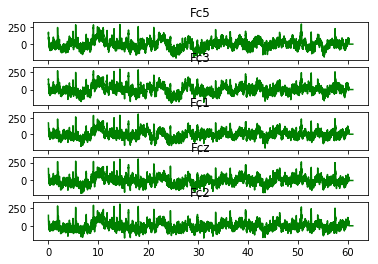

In [3]:
EO.plot_data(nbr_of_channels = 5)

#### Eyes-closed data: first 5 channels

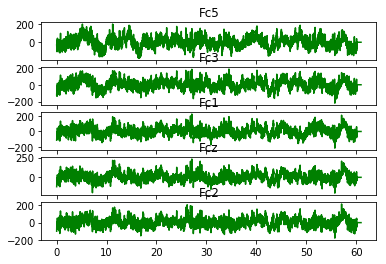

In [4]:
EC.plot_data(nbr_of_channels = 5)

### Estimation of the functional brain connectivity using Direct Transfer Function (DTF)

#### Eyes-opened case

In [5]:
dtf_matrix_EO = EO.get_connectivity_matrix_DTF()

#### Eyes-closed case

In [6]:
dtf_matrix_EC = EC.get_connectivity_matrix_DTF()

### Select one relevant frequency value using elementary power spectral density analysis

In [10]:
def find_max_psd_frequency(signals, fs, plot_chan):
    # Estimating power spectral density using Welch’s method.
    frequencies, psds = sig.welch(signals, fs=fs)
    
    for chan in range(plot_chan):
        plt.semilogy(frequencies, psds[chan])
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    plt.show()
    
    average_psds = np.average(psds, axis = 0)
    return frequencies[np.argmax(average_psds)]

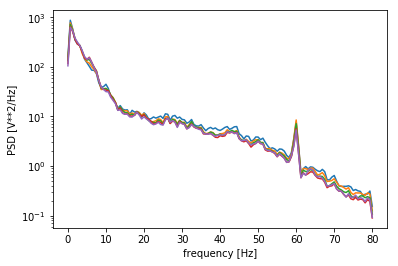

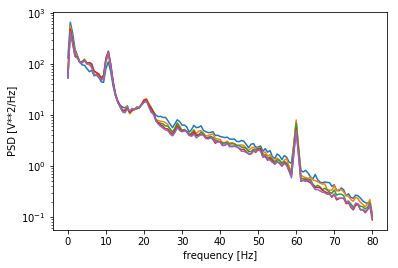

Maximum power spectral density @ frequency eyes opened case:  0.625
Maximum power spectral density @ frequency eyes closed case:  0.625


In [13]:
sampling_frequency = 160.0
dominant_frequency_open = find_max_psd_frequency(EO.signals, sampling_frequency, 5)
dominant_frequency_closed = find_max_psd_frequency(EC.signals, sampling_frequency, 5)

print('Maximum power spectral density @ frequency eyes opened case: ', dominant_frequency_open)
print('Maximum power spectral density @ frequency eyes closed case: ', dominant_frequency_closed)

Observing the power spectral density at two dataset, we can observe the concentration of signal power at frequencies around 0.625Hz for both dataset. Hence we will proceed our analysis with target frequency of 1.

In [14]:
relevant_frequency = 1

### Apply a threshold to get a binary connectivity matrix with network density equal to 20%

#### Eyes-opened

In [15]:
dtf_bin_adj_matrix_EO, dtf_Graph_EO, threshold1 = EO.get_binary_adjacency_matrix(dtf_matrix_EO, 
                                                                                 relevant_frequency = relevant_frequency,
                                                                                 mvar_estimator = "dtf",
                                                                                 target_density = 20)
print("Threshold used: ", threshold1)
print("Binary connectivity matrix network density: "+str(int(nx.density(dtf_Graph_EO)*100))+"%")

Threshold used:  0.135
Binary connectivity matrix network density: 20%


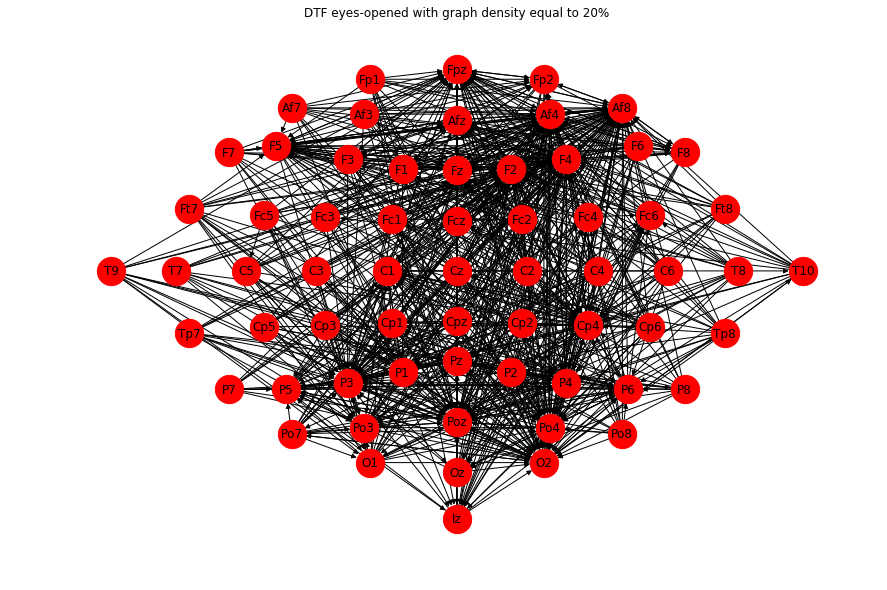

In [16]:
# Create a graphical representation of the binary adjacency matrix
EO.show_graph(dtf_Graph_EO, "DTF eyes-opened with graph density equal to 20%",
              locations,
              saving_path = "../../Images/Q1_1_DTF_eyes_opened", save = True)

##### Eyes-closed

In [17]:
dtf_bin_adj_matrix_EC, dtf_Graph_EC, threshold2 = EC.get_binary_adjacency_matrix(dtf_matrix_EC, 
                                                                                 relevant_frequency = relevant_frequency,
                                                                                 mvar_estimator = "dtf",
                                                                                 target_density = 20)
print("Threshold used: ", threshold2)
print("Binary connectivity matrix network density: "+str(int(nx.density(dtf_Graph_EC)*100))+"%")

Threshold used:  0.121
Binary connectivity matrix network density: 20%


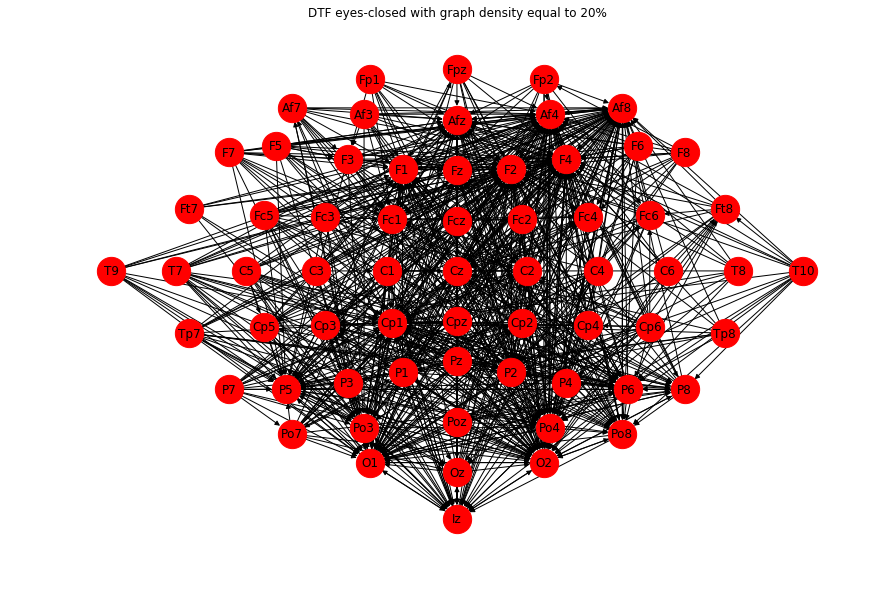

In [18]:
# Create a graphical representation of the binary adjacency matrix
EC.show_graph(dtf_Graph_EC, "DTF eyes-closed with graph density equal to 20%",
              locations,
              saving_path = "../../Images/Q1_1_DTF_eyes_closed", save = True)

In [12]:
# Let's save the classes on the disck in order to resuse them in further questions
with open("../Pickle/EO_11.file", "wb") as f:
    pickle.dump(EO, f, pickle.HIGHEST_PROTOCOL)
f.close()
with open("../Pickle/EC_11.file", "wb") as f:
    pickle.dump(EC, f, pickle.HIGHEST_PROTOCOL)
f.close()